## Imports

In [237]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error as MSE

## Reading and preparing the df

In [11]:
horsey = pd.read_csv('finalmerged_clean').drop('Unnamed: 0', axis=1)

#### Smaller data set (maiden females)

In [7]:
MaidenFems = horsey.iloc[42:49]
MaidenFems

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
42,Dhafeera,1:40.25,10025,1,0,2,5,0,0.400000,10,374.000000,494.000000,616.800000
43,Jazaalah,1:40.46,10046,1,0,0,4,2,0.500000,10,385.000000,481.000000,620.333333
44,Meal Ticket,1:40.58,10058,1,0,2,6,0,0.333333,37,370.000000,499.571429,620.166667
45,You Missed It,1:40.84,10084,1,0,5,7,1,0.857143,41,366.333333,492.363636,614.545455
46,Blossom Trail Miss,1:40.89,10089,1,0,0,3,1,0.333333,51,378.666667,500.923077,630.500000
47,Chalky,1:40.99,10099,1,0,2,5,1,0.600000,20,376.000000,504.500000,626.571429
48,Beauty Divine,1:41.75,10175,1,0,0,3,0,0.000000,27,389.333333,515.333333,624.000000


#### Larger data set (without maiden females)

In [12]:
horse_fast = horsey.drop(horsey.index[42:49]).reset_index(drop=True)
horse_fast

,Horse Name,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,Blame the Rider,1:35.11,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
1,Majestic Eagle,1:35.25,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
2,Sellwood,1:35.39,9539,0,0,1,2,1,1.000000,28,365.333333,488.666667,619.333333
3,Cajun Treasure,1:35.39,9539,0,0,0,0,0,0.000000,18,366.500000,496.571429,618.000000
4,Friendly Outthedor,1:35.69,9569,0,0,1,4,0,0.250000,46,373.142857,493.666667,611.500000
5,Pointed,1:35.79,9579,0,0,0,5,0,0.000000,29,367.500000,490.750000,612.769231
6,Dignitaire,1:36.25,9625,0,0,0,3,1,0.333333,32,376.400000,498.571429,623.333333
7,Papa Joe,1:36.71,9671,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
8,Tule Fog,1:34.19,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
9,Lymebyrd,1:34.83,9483,0,2,3,15,1,0.400000,44,369.000000,491.176471,608.421053


In [13]:
horse_fast = horse_fast.drop('Final_Time',1).drop('Horse Name',1)
horse_fast

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,9511,0,0,0,5,1,0.200000,28,366.500000,490.000000,614.909091
1,9525,0,0,2,4,0,0.500000,35,386.666667,506.714286,622.666667
2,9539,0,0,1,2,1,1.000000,28,365.333333,488.666667,619.333333
3,9539,0,0,0,0,0,0.000000,18,366.500000,496.571429,618.000000
4,9569,0,0,1,4,0,0.250000,46,373.142857,493.666667,611.500000
5,9579,0,0,0,5,0,0.000000,29,367.500000,490.750000,612.769231
6,9625,0,0,0,3,1,0.333333,32,376.400000,498.571429,623.333333
7,9671,0,0,0,1,0,0.000000,15,382.666667,503.111111,634.000000
8,9419,0,1,1,6,1,0.500000,34,381.750000,492.333333,614.727273
9,9483,0,2,3,15,1,0.400000,44,369.000000,491.176471,608.421053


## Splitting into Master Test-Train

In [38]:
ttest = horse_fast.iloc[[1,5,10,15,20,25,30,35,40,45,50]].reset_index(drop=True)

In [50]:
ttrain = horse_fast.drop(axis = 0, index = [1,5,10,15,20,25,30,35,40,45,50]).sample(frac=1).reset_index(drop=True)

In [51]:
ttrain

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,9545,0,1,3,9,1,0.555556,58,377.090909,498.250000,629.555556
1,9499,1,3,5,13,1,0.692308,61,383.142857,495.630435,619.200000
2,9452,1,2,4,11,0,0.545455,46,373.000000,494.588235,619.920000
3,9516,0,1,0,9,0,0.111111,39,373.428571,490.000000,610.800000
4,9617,0,1,1,4,0,0.500000,19,378.666667,498.571429,621.111111
5,9624,1,1,3,13,4,0.615385,33,365.333333,493.875000,621.285714
6,9548,0,4,3,20,3,0.500000,38,376.000000,488.666667,611.600000
7,9559,1,1,3,14,1,0.357143,45,379.333333,496.125000,620.833333
8,9468,1,4,7,18,2,0.722222,66,371.142857,493.473684,624.666667
9,9477,0,1,3,6,0,0.666667,30,371.333333,489.500000,612.000000


In [52]:
y_ttrain = ttrain['Final_Time_Hund'] 
y_ttest = ttest['Final_Time_Hund']    #extract dependent variable

X_ttrain = ttrain.drop('Final_Time_Hund',1)
X_ttest = ttest.drop('Final_Time_Hund',1) # Get rid of ind. variables

## Testing Assumptions

Didn't complete for sake of time

#### Assumption 1

In [68]:
XAssum = X_ttrain
yAssum = y_ttrain

In [69]:
XAssum_train, XAssum_test, yAssum_train, yAssum_test = train_test_split(XAssum, yAssum, test_size=0.2)

In [73]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(XAssum_train, yAssum_train)
    pred = rgr.predict(XAssum_test, yAssum_test)

#Regression plot
    plt.subplot(1, 3, 1)
    plt.scatter(XAssum_train,yAssum_train)
    plt.plot(XAssum_train, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    
#Residual plot (true minus predicted)
    plt.subplot(1, 3, 2)
    res = yAssum_train - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
#A Q-Q plot (for the scope of today), it's a percentile, percentile plot. When the predicted and actual distributions
#are the same, they Q-Q plot has a diagonal 45degree line. When stuff diverges, the kertosis between predicted and actual are different, 
#your line gets wonky. 
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

diagnostic_plot(XAssum_train, yAssum_train)


modelA = ElasticNet(1, l1_ratio=.5)
fit = modelA.fit(XAssum_train, yAssum_train)
rsq = fit.score(XAssum_train, yAssum_train)
adj_rsq = 1 - (1-rsq)*(len(yAssum_train)-1)/(len(yAssum_train)-XAssum_train.shape[1]-1)

print(rsq)
print(adj_rsq)

TypeError: predict() takes 2 positional arguments but 3 were given

#### Assumption 2

In [75]:
# develop OLS with Sklearn
X = ttrain[1:]
y = ttrain[0]  # predictor

lr = LinearRegression()
fit = lr.fit(X,y)

t['predict']=fit.predict(X)
data['resid']=data.cnt-data.predict
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

NameError: name 'data' is not defined

## Model 0 - Linear Regression

Working with the training data that doesn't include the maiden-filly race. 

In [136]:
horsey = ttrain


In [140]:
Xlin = X_ttrain
ylin = y_ttrain

#### Regplots

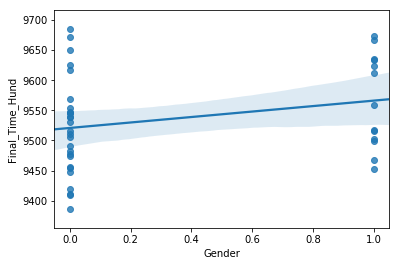

In [110]:
sns.regplot('Gender','Final_Time_Hund', data=horsey);
#Makes sense! Male horses tend to be a little faster. 

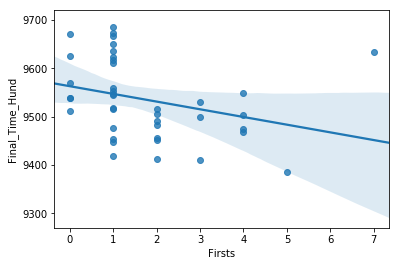

In [111]:
sns.regplot('Firsts','Final_Time_Hund', data=horsey);
#Makes sense! Horses that have won more races tend to be faster. 

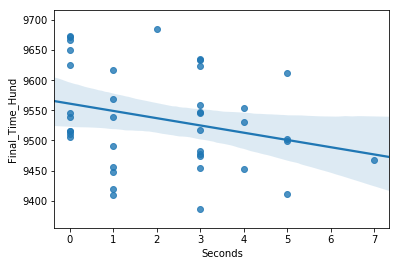

In [112]:
sns.regplot('Seconds','Final_Time_Hund', data=horsey);
#Similar to the result for "firsts", but slightly less apparent.

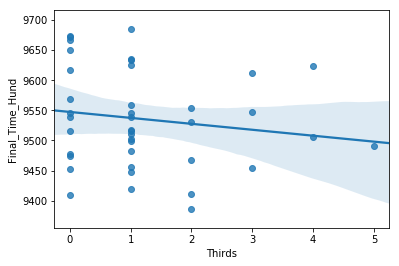

In [113]:
sns.regplot('Thirds','Final_Time_Hund', data=horsey);
#Similar to the results above. 

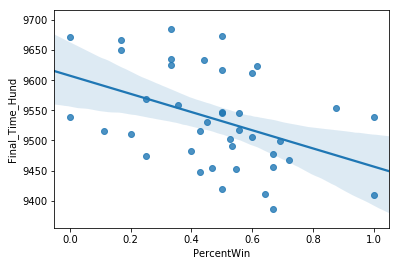

In [117]:
sns.regplot('PercentWin','Final_Time_Hund', data=horsey);
#Not a great correlation...

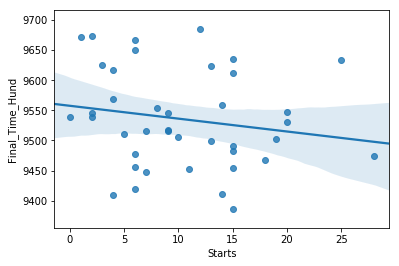

In [116]:
sns.regplot('Starts','Final_Time_Hund', data=horsey);
#This seems pretty uncorrelated...

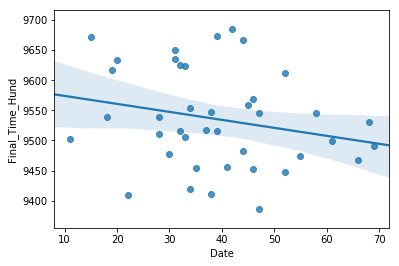

In [119]:
sns.regplot('Date','Final_Time_Hund', data=horsey);
#Horses with more practice have faster times. But pretty uncorrelated... 

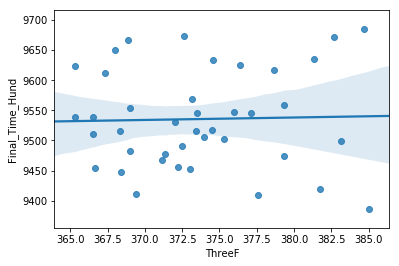

In [121]:
sns.regplot('ThreeF','Final_Time_Hund', data=horsey);
#Really no correlation!

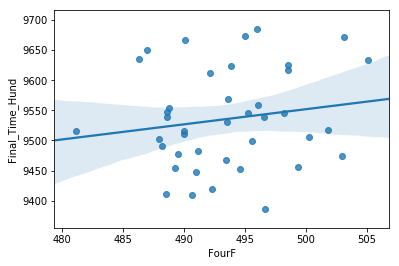

In [123]:
sns.regplot('FourF','Final_Time_Hund', data=horsey);
#Huh, not great either. 

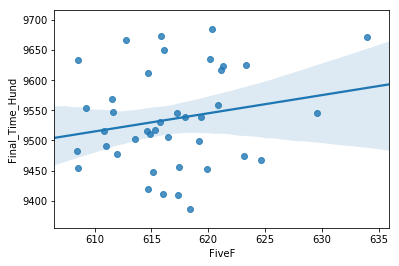

In [124]:
sns.regplot('FiveF','Final_Time_Hund', data=horsey);
#Slower practice time means slower finaltime. But yeah... pretty uncorrelated...

#### Correlations

In [125]:
horsey.corr()

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
Final_Time_Hund,1.000000,0.265424,-0.301895,-0.277416,-0.176527,-0.153785,-0.429009,-0.230641,0.027906,0.162572,0.203877
Gender,0.265424,1.000000,0.231439,0.386636,0.264124,0.017094,0.066163,0.038277,-0.021974,-0.022137,0.026920
Firsts,-0.301895,0.231439,1.000000,0.485509,0.753160,0.187440,0.274356,0.147789,0.274696,0.183013,-0.172966
Seconds,-0.277416,0.386636,0.485509,1.000000,0.681483,0.303528,0.432268,0.352456,0.073078,-0.026435,0.003861
Starts,-0.176527,0.264124,0.753160,0.681483,1.000000,0.418247,0.083000,0.356485,0.167248,0.079705,-0.170609
Thirds,-0.153785,0.017094,0.187440,0.303528,0.418247,1.000000,0.333898,0.307176,-0.193776,-0.148424,-0.198325
PercentWin,-0.429009,0.066163,0.274356,0.432268,0.083000,0.333898,1.000000,0.133901,-0.055947,-0.143185,-0.095982
Date,-0.230641,0.038277,0.147789,0.352456,0.356485,0.307176,0.133901,1.000000,0.037849,0.001242,0.031068
ThreeF,0.027906,-0.021974,0.274696,0.073078,0.167248,-0.193776,-0.055947,0.037849,1.000000,0.428560,0.422710
FourF,0.162572,-0.022137,0.183013,-0.026435,0.079705,-0.148424,-0.143185,0.001242,0.428560,1.000000,0.444496


In [127]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12, 10)

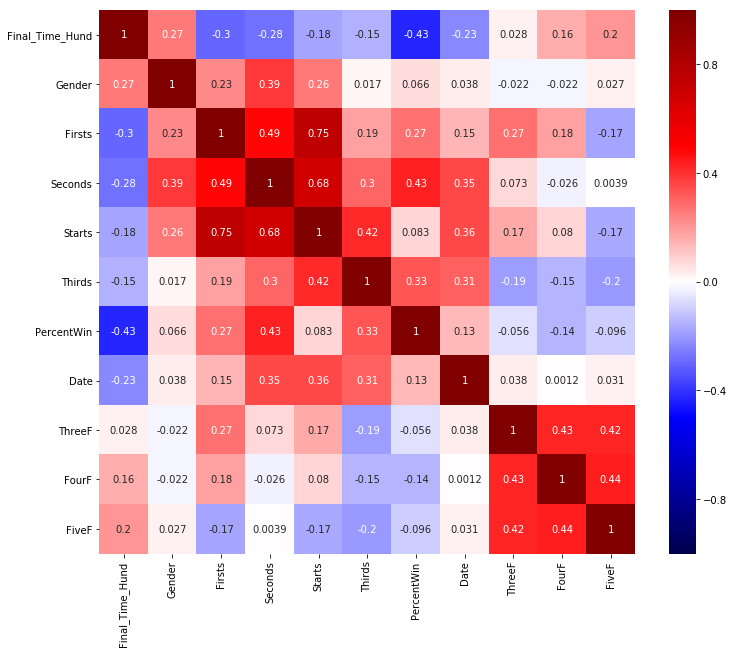

In [128]:
sns.heatmap(horsey.corr(), vmin=-1,vmax=1,annot=True, cmap='seismic');

Pretty terrible... but it seems like FiveF, Date, Gender and Percent win are the best... (in that order).  

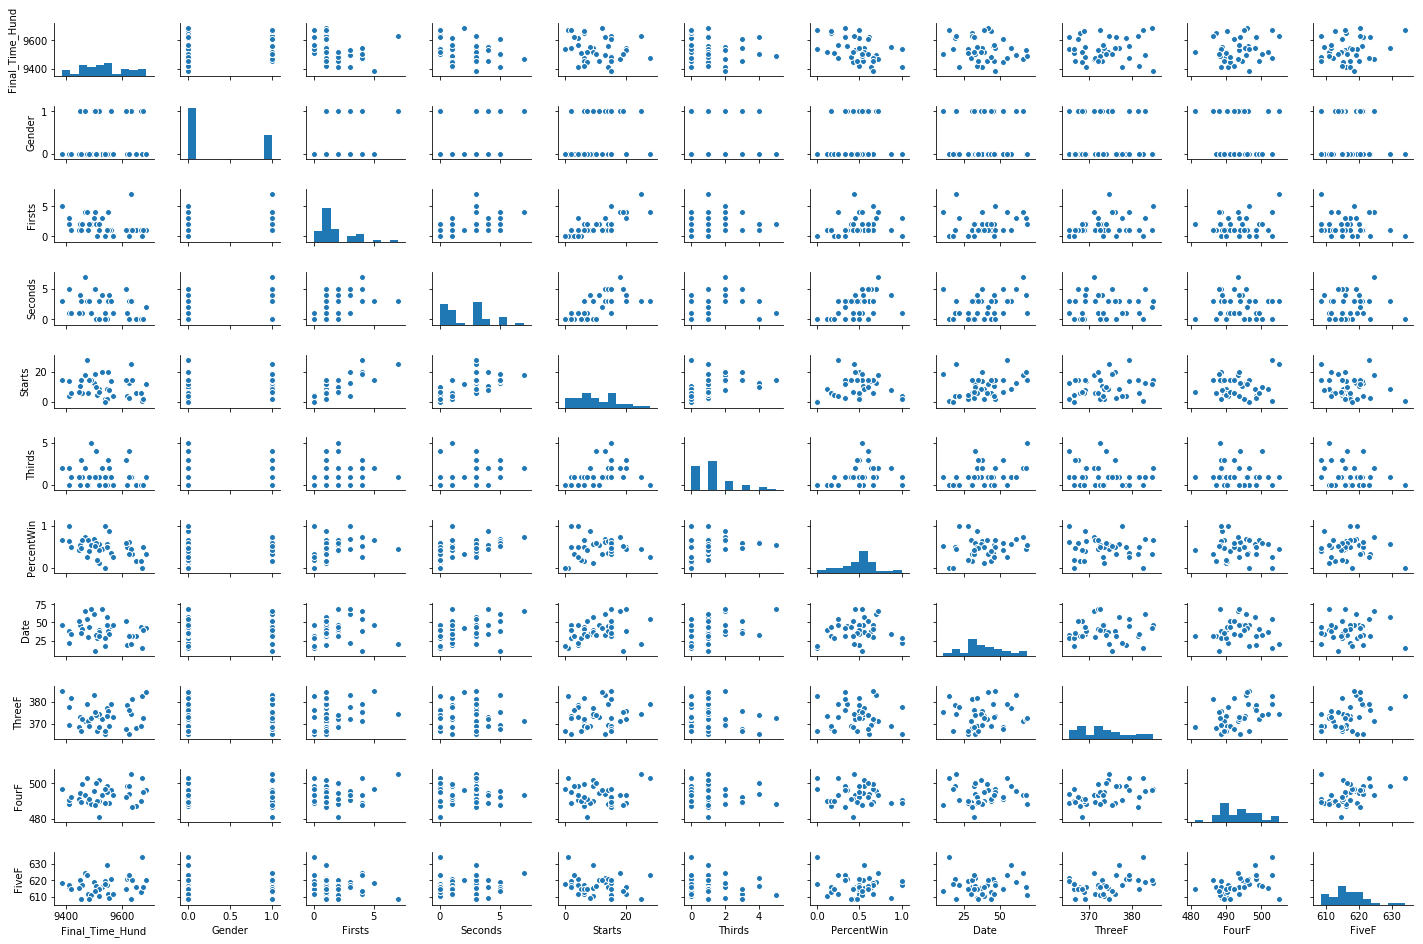

In [129]:
sns.pairplot(horsey, size = 1.2, aspect=1.5);

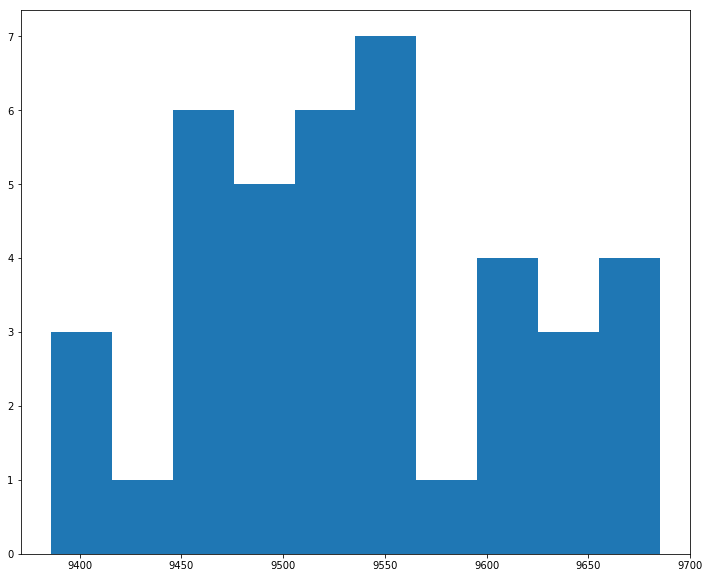

In [131]:
plt.hist(horsey.Final_Time_Hund);

#### Linear Regression (All inputs)

In [139]:
#Gotta add the constant... without it my r^2 was 1.0!
Xlin = sm.add_constant(Xlin)
#Creating the model
lin_model = sm.OLS(ylin,Xlin)
# Fitting the model to the training set
fit_lin = lin_model.fit()
# Print summary statistics of the model's performance
fit_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Final_Time_Hund   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2.205
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0473
Time:                        14:03:25   Log-Likelihood:                -220.76
No. Observations:                  40   AIC:                             463.5
Df Residuals:                      29   BIC:                             482.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7520.4643   1461.675      5.145      0.000    4531.004    1.05e+04
Gender        72.3813     26.755      2.705      0.011      17.660     127.102
Firsts       -22.1522     14.573     -1.520      0.139     -51.958       7.653
Seconds      -13.0098     11.496     -1.132      0.267     -36.522      10.502
Starts         3.4620      4.479      0.773      0.446      -5.699      12.623
Thirds         3.5277     12.130      0.291      0.773     -21.280      28.335
PercentWin   -70.3079     75.585     -0.930      0.360    -224.897      84.281
Date          -1.0080      0.907     -1.111      0.276      -2.863       0.847
ThreeF         0.4862      2.587      0.188      0.852      -4.805       5.777
FourF          2.2216      2.654      0.837      0.409      -3.207       7.650
FiveF          1.3168      2.724      0.483      0.632      -4.255       6.889
==============================================================================
Omnibus:                        4.000   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                1.937
Skew:                           0.218   Prob(JB):                        0.380
Kurtosis:                       2.014   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- r2 could be worse...
- adj r2 also could be worse...
- Inputs that seem significant based on pvalue : Gender... that's about it! The other lowests are Firsts, seconds and date (though they're quite crappy). But I guess if 70% of data lies within the level of confidence... that's better than none...

** TESTING! **

In [141]:
Xlin = X_ttrain
ylin = y_ttrain

In [148]:
lr_train = LinearRegression()
lr_fit = lr_train.fit(Xlin, ylin)

r2_training = lr_train.score(Xlin, ylin)
r2adj_training = 1 - (1-r2_training)*(len(ylin)-1)/(len(ylin)-Xlin.shape[1]-1)

preds = lr_fit.predict(X_ttest)
rmse = np.sqrt(MSE(y_ttest, preds))

print('R2:', r2_training)
print('R2 Adjusted:', r2adj_training)
print('Output Predictions', preds)
print('RMSE:', rmse)


R2: 0.4319523569243877
R2 Adjusted: 0.23607385931210767
Output Predictions [9571.51155428 9584.37729715 9569.09795451 9564.66413762 9454.58227211
 9522.1853719  9566.59489312 9566.16649405 9568.44364943 9605.75899683
 9654.15466177]
RMSE: 134.49558155404648


#### Linear Regression (Updated Inputs)

Below is the best combination of features to drop: Thirds, ThreeF & PrecentWin

In [262]:
Xlin2 = Xlin.drop(labels ='Thirds', axis = 1).drop(labels ='ThreeF', axis = 1).drop(labels ='PercentWin', axis = 1)
ylin2 = y_ttrain

In [263]:
#Gotta add the constant... without it my r^2 was 1.0!
Xlin2 = sm.add_constant(Xlin2)

#Creating the model
lin_model = sm.OLS(ylin,Xlin2)

# Fitting the model to the training set
fit_lin = lin_model.fit()

# Print summary statistics of the model's performance
fit_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Final_Time_Hund   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     3.226
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0106
Time:                        17:04:55   Log-Likelihood:                -221.40
No. Observations:                  40   AIC:                             458.8
Df Residuals:                      32   BIC:                             472.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7241.5308   1359.404      5.327      0.000    4472.515       1e+04
Gender        75.7018     25.348      2.986      0.005      24.069     127.334
Firsts       -28.5878     11.451     -2.497      0.018     -51.912      -5.264
Seconds      -19.7000      8.772     -2.246      0.032     -37.568      -1.832
Starts         6.0134      3.119      1.928      0.063      -0.339      12.366
Date          -1.0830      0.865     -1.252      0.220      -2.845       0.680
FourF          2.6025      2.508      1.038      0.307      -2.505       7.710
FiveF          1.7126      2.416      0.709      0.484      -3.208       6.634
==============================================================================
Omnibus:                        3.505   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.840
Skew:                           0.227   Prob(JB):                        0.399
Kurtosis:                       2.052   Cond. No.                     9.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Slightly better...

## Model A - Elastic Net (no frills)

In [146]:
## Establishing x and y

XA = X_ttrain
yA = y_ttrain

In [232]:
#Checking the predictability of the model with this alpha = 1
modelA = ElasticNet(1, l1_ratio=.5)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)


print(rsq)
print(adj_rsq)

0.30733402796483356
0.06848369278029331


** 0.3073 **  not great... but not terrible. 30% of the variance is explained by the model. 

In [80]:
#Let's see if I play around with the ratios of L1 and L2

modelA = ElasticNet(1, l1_ratio=.2)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)

0.2773051493067136
0.02810002837799408


** Looks slightly worse. I guess there wasn't much need to compress complexity, or fix colinearity. **

In [81]:
#Let's check it in the other direction, with L1 getting more weight.

modelA = ElasticNet(1, l1_ratio=.98)
fit = modelA.fit(XA, yA)
rsq = fit.score(XA, yA)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

print(rsq)
print(adj_rsq)


0.41903203286967117
0.21869825110059227


** Seems like l1 of 0.98 really takes the cake! Let's check out alpha... Might be worth it to switch to a 
Lasso model... something to keep in mind**

In [155]:
#Let's see if we can find a better alpha...

kf = KFold(n_splits=5, shuffle = True, random_state = 40 )

alphas = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000, 100000, 1000000]
#alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
errors = []
for i in alphas:
   err_list = []
   for train_index, test_index in kf.split(XA):
       #print("TRAIN:", train_index, "TEST:", test_index) #This gives the index of the rows you're training and testing. 
       XA_train, XA_test = XA.loc[train_index], XA.loc[test_index]
       yA_train, yA_test = yA[train_index], yA[test_index]
 
       ef = ElasticNet(i, l1_ratio = 0.5)
       ef.fit(XA_train,yA_train)
       #print(ef.coef_) #This prints the coefficients of each of the input variables. 
       preds = ef.predict(XA_test) #Predictions for the y value. 
       error = np.sqrt(MSE(preds,yA_test))
       err_list.append(error)
       
   error = np.mean(err_list)
   errors.append(error)
   print("The RMSE for alpha = {0} is {1}".format(i,error))

The RMSE for alpha = 1e-09 is 91.81676048874472
The RMSE for alpha = 1e-08 is 91.81675800679318
The RMSE for alpha = 1e-07 is 91.81673318723008
The RMSE for alpha = 1e-06 is 91.81648500108626
The RMSE for alpha = 1e-05 is 91.81400415413242
The RMSE for alpha = 0.0001 is 91.78929653852856
The RMSE for alpha = 0.001 is 91.55190229188295
The RMSE for alpha = 0.01 is 89.86247747686414
The RMSE for alpha = 0.1 is 86.18239990702807
The RMSE for alpha = 1 is 86.22685788137446
The RMSE for alpha = 10 is 85.58936962368537
The RMSE for alpha = 100 is 80.68484780710189
The RMSE for alpha = 1000 is 79.81833497094951
The RMSE for alpha = 10000 is 79.81833497094951
The RMSE for alpha = 100000 is 79.81833497094951
The RMSE for alpha = 1000000 is 79.81833497094951


** Looks like the best alpha is around 1000! Lets see if we can get even more granular. **

In [85]:
kf = KFold(n_splits=5, shuffle = True, random_state = 40)

alphas = [500, 600, 800, 900, 1000, 1500, 2000, 3000]
#alphas = [0,.001,.01,.1,.2,.5,.9,1,5,10,50,100,1000,10000]
errors = []
for i in alphas:
   err_list = []
   for train_index, test_index in kf.split(XA):
       #print("TRAIN:", train_index, "TEST:", test_index) #This gives the index of the rows you're training and testing. 
       XA_train, XA_test = XA.loc[train_index], XA.loc[test_index]
       yA_train, yA_test = yA[train_index], yA[test_index]
 
       ef = ElasticNet(i)
       ef.fit(XA_train,yA_train)
       #print(ef.coef_) #This prints the coefficients of each of the input variables. 
       preds = ef.predict(XA_test) #Predictions for the y value. 
       error = np.sqrt(MSE(preds,yA_test))
       err_list.append(error)
       
   error = np.mean(err_list)
   errors.append(error)
   print("The RMSE for alpha = {0} is {1}".format(i,error))

The RMSE for alpha = 500 is 79.93218785178335
The RMSE for alpha = 600 is 79.86798894741898
The RMSE for alpha = 800 is 79.81833497094951
The RMSE for alpha = 900 is 79.81833497094951
The RMSE for alpha = 1000 is 79.81833497094951
The RMSE for alpha = 1500 is 79.81833497094951
The RMSE for alpha = 2000 is 79.81833497094951
The RMSE for alpha = 3000 is 79.81833497094951


** I'm going to settle on an alpha of 800 **

In [225]:
#Checking the predictability of the model again with the new alpha of 90. 
modelA = ElasticNet(alpha = 800)
fit = modelA.fit(XA, yA)
fit.score(XA, yA)

0.0

Hm. Not really sure what that did, but definitely didn't work...

** TESTING **

Doing ElasticNetCV (withouth any modifications)

In [288]:
## Letting it do it's thing on it's own.

encvA = ElasticNetCV()
fitA = encvA.fit(XA, yA)

r2_training = encvA.score(XA, yA)
y= np.trim_zeros(encvA.fit(XA,yA).coef_)
#r2adj_training = 1 - (1-r2_training)*(XA.shape[1]-1)/(XA.shape[1]-len(y)-1)
adj_rsq = 1 - (1-r2_training)*(len(XA)-1)/(len(XA)-XA.shape[1]-len(y)-1)

preds = fitA.predict(X_ttest)
rmse = np.sqrt(MSE(preds, y_ttest))

print('R2:', r2_training)
print('R2 Adjusted:', adj_rsq)
print('Output Predictions', preds)
print('RMSE:', rmse)
print('Alpha:',encvA.alpha_)
print('L1:',encvA.l1_ratio_)
print('Coefficients:',fitA.coef_)



R2: 0.1250239164325775
R2 Adjusted: -0.7960035399541829
Output Predictions [9568.44703874 9544.25401996 9569.26138184 9558.15080173 9500.44511137
 9506.81075853 9578.79823457 9536.96686145 9508.45334023 9520.20310548
 9541.95653301]
RMSE: 146.62930213115092
Alpha: 19.39130187288461
L1: 0.5
Coefficients: [ 0.14406805 -1.53266832 -1.23154879 -0.34943161 -0.         -0.
 -1.09796857 -0.0641983   1.12444581  1.63415956]


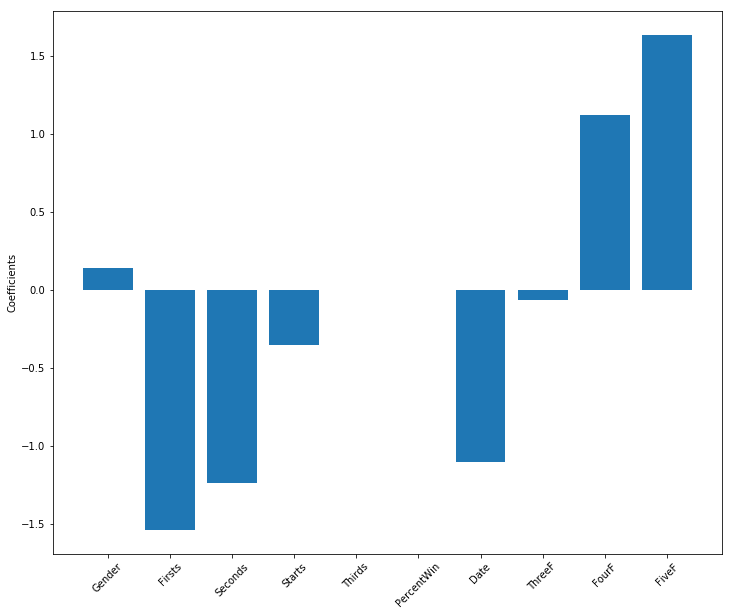

In [173]:
elastic_coef = encvA.fit(XA, yA).coef_
_ = plt.bar(range(len(XA.columns)), elastic_coef)
_ = plt.xticks(range(len(XA.columns)), XA.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()

Doing ElasticNet CV - changing the l1 ratio

In [317]:
encvA2 = ElasticNetCV(l1_ratio = .99)
fitA2 = encvA2.fit(XA, yA)

r2_training = encvA2.score(XA, yA)
y= np.trim_zeros(encvA2.fit(XA,yA).coef_)
adj_rsq = 1 - (1-r2_training)*(len(XA)-1)/(len(XA)-XA.shape[1]-len(y)-1)

preds = fitA2.predict(X_ttest)
rmse = np.sqrt(MSE(y_ttest, preds))

print('R2:', r2_training)
print('R2 Adjusted:', adj_rsq)
print('Output Predictions', preds)
print('RMSE:', rmse)
print('Alpha:',encvA2.alpha_)
print('L1:',encvA2.l1_ratio_)
print('Coefficients:',fitA.coef_)

R2: 0.13490409373110013
R2 Adjusted: -0.686937017224355
Output Predictions [9569.73379751 9544.83798636 9569.55519996 9559.76238991 9499.72243453
 9505.65263375 9580.09286092 9538.58865853 9508.72077406 9524.05346858
 9544.148973  ]
RMSE: 145.8223278150644
Alpha: 22.624455747388357
L1: 0.99
Coefficients: [ 0.14406805 -1.53266832 -1.23154879 -0.34943161 -0.         -0.
 -1.09796857 -0.0641983   1.12444581  1.63415956]


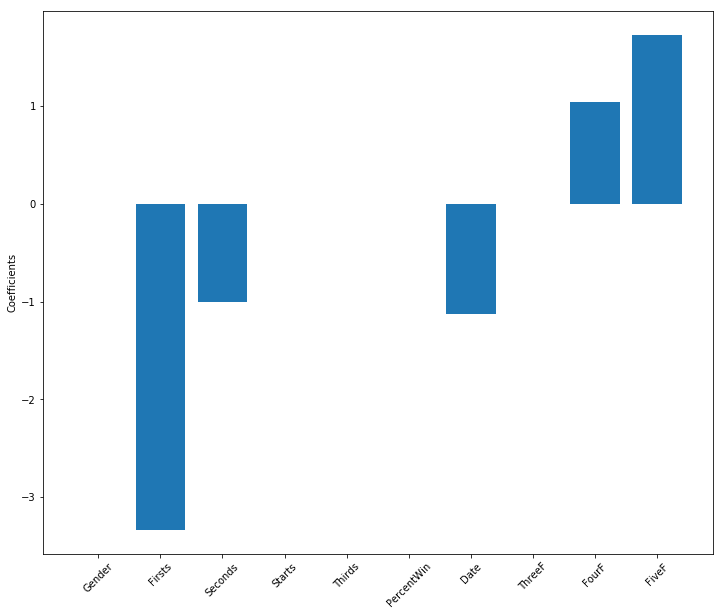

In [169]:
elastic_coef = encvA2.fit(XA, yA).coef_
_ = plt.bar(range(len(XA.columns)), elastic_coef)
_ = plt.xticks(range(len(XA.columns)), XA.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()

### Extras

In [90]:
## L1 is 0.98

encvA2 = ElasticNetCV(l1_ratio = 0.98)
fitA2 = encvA2.fit(XA_train, yA_train)


rsq = fitA2.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA2.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA2.alpha_)
print(encvA2.l1_ratio_)



-0.7699761779104741
-1.3803127909830515
[9530.22201358 9557.78660356 9568.12085351 9515.09437083 9408.69257225
 9539.52109345 9552.02503325 9592.0898741 ]
106.13663706955026
13.708083498640713
0.98


Still weird... 

In [91]:
## Trying some alphas... 

encvA3 = ElasticNetCV(alphas = [80,800,1000])
fitA3 = encvA3.fit(XA_train, yA_train)


rsq = fitA3.score(XA_test, yA_test)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yA)-XA.shape[1]-1)

preds = fitA3.predict(XA_test)
mserror = np.sqrt(MSE(preds,yA_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(encvA3.alpha_)
print(encvA3.l1_ratio_)

-0.03034522766804737
-0.3856366854846154
[9531.84786531 9537.12219259 9555.26771165 9537.26522148 9522.40946291
 9540.5271364  9528.01989905 9550.6925083 ]
80.97910904887202
80
0.5


Still confused... 

## Model B - Elastic Net (polynomial transformation)

In [95]:
## Establishing x and y

XB = X_ttrain
yB = y_ttrain

In [228]:
ModelB = make_pipeline(PolynomialFeatures(2), LinearRegression())
fit = ModelB.fit(XB, yB)
rsq = fit.score(XB, yB)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yB)-XB.shape[1]-1)

print(rsq)
print(adj_rsq)


1.0
1.0


In [196]:
ModelB = make_pipeline(PolynomialFeatures(3), ElasticNetCV(l1_ratio = .5))
fit = ModelB.fit(XB, yB)
rsq = fit.score(XB, yB)
adj_rsq = 1 - (1-rsq)*(len(yA)-1)/(len(yB)-XB.shape[1]-1)

print(rsq)
print(adj_rsq)



/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.10592095887105701
-0.20238215875961307


... Hm ... Not great. But we'll test it anyway.

** TESTING **

In [230]:
encvB = make_pipeline(PolynomialFeatures(2), LinearRegression())
fitB = encvB.fit(XB, yB)


r2_training = encvB.score(X_ttest, y_ttest)
#y= np.trim_zeros(encvB.fit(XB,yB).coef_)
#r2adj_training = 1 - (1-r2_training)*(XB.shape[1]-1)/(XB.shape[1]-len(y)-1)


preds = fitB.predict(X_ttest)
rmse = np.sqrt(MSE(y_ttest, preds))

print('R2:', r2_training)
print('R2 Adjusted:', r2adj_training)
print('Output Predictions', preds)
print('RMSE:', rmse)
print('Alpha:',encvB_steps.elasticnetcv.alpha_)
print('L1:',encvB.named_steps.elasticnetcv.l1_ratio_)


R2: -6.44286573439161
R2 Adjusted: 8.874784752106773
Output Predictions [ 9603.93575421  9626.20719928  9543.74011595  9648.26260264
  9876.89530352  9057.03108162  9049.60166209 10380.37207319
  9489.22416851  9204.46604812  9389.82733389]
RMSE: 400.1589267503806


NameError: name 'encvB_steps' is not defined

In [96]:
#Testing the predictability of the model with this alpha = 0.5
XB_train, XB_test, yB_train, yB_test = train_test_split(XB, yB, test_size=0.2)

In [103]:
modelB = make_pipeline(PolynomialFeatures(2), ElasticNetCV(l1_ratio = .5))
modelB.fit(XB_train, yB_train)
rsq = modelB.score(XB_train,yB_train)
adj_rsq = 1 - (1-rsq)*(len(yB_train)-1)/(len(yB_train)-XB_train.shape[1]-1)

preds = fitA3.predict(XB_test)
mserror = np.sqrt(MSE(preds,yB_test))
print(rsq)
print(adj_rsq)
print(preds)
print(mserror)
print(modelB.named_steps.elasticnetcv.alpha_)
print(modelB.named_steps.elasticnetcv.l1_ratio_)

0.24223454866587957
-0.11860614244560641
[9520.38536911 9535.49478345 9538.04112195 9537.26522148 9535.89628111
 9531.84786531 9534.06521828 9504.76352166]
75.95291917851185
36914.51228303739
0.5


/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Model C - Elastic Net CV with transformations

On second review, none of the inputs would benefit from transformations

In [207]:
C_train = ttrain

In [214]:
C_train['new_firsts_log']=np.log(C_train.Firsts)


/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [220]:
C_train
#C_train.new_firsts_log.str.replace('-inf', '0')

,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF,new_firsts_log
0,9545,0,1,3,9,1,0.555556,58,377.090909,498.250000,629.555556,0.000000
1,9499,1,3,5,13,1,0.692308,61,383.142857,495.630435,619.200000,1.098612
2,9452,1,2,4,11,0,0.545455,46,373.000000,494.588235,619.920000,0.693147
3,9516,0,1,0,9,0,0.111111,39,373.428571,490.000000,610.800000,0.000000
4,9617,0,1,1,4,0,0.500000,19,378.666667,498.571429,621.111111,0.000000
5,9624,1,1,3,13,4,0.615385,33,365.333333,493.875000,621.285714,0.000000
6,9548,0,4,3,20,3,0.500000,38,376.000000,488.666667,611.600000,1.386294
7,9559,1,1,3,14,1,0.357143,45,379.333333,496.125000,620.833333,0.000000
8,9468,1,4,7,18,2,0.722222,66,371.142857,493.473684,624.666667,1.386294
9,9477,0,1,3,6,0,0.666667,30,371.333333,489.500000,612.000000,0.000000


## Predicting Today's Race!

In [339]:
todays_race = pd.read_csv('big_race_day').drop('Unnamed: 0', axis = 1).drop('Horse Name', axis =1)
## today_race acting as testing x

In [341]:
todays_race

,Gender,Firsts,Seconds,Starts,Thirds,PercentWin,Date,ThreeF,FourF,FiveF
0,1,0,0,1,0,0.000000,17,350.0,515.250000,627.750000
1,1,0,0,0,0,0.000000,14,382.5,504.857143,653.000000
2,1,0,1,3,1,0.666667,23,375.0,489.750000,618.200000
3,1,0,1,3,0,0.333333,25,371.0,492.500000,620.800000
4,1,0,1,3,1,0.666667,7,378.0,486.000000,621.000000
5,1,0,2,2,0,1.000000,24,371.0,490.000000,617.857143
6,1,0,0,3,1,0.333333,31,380.4,494.235294,614.444444
7,1,0,0,6,0,0.000000,37,370.0,494.000000,617.058824
8,1,0,0,3,0,0.000000,32,370.0,503.238095,631.600000


### Maiden Fems Prediction

In [342]:
ym_train = MaidenFems['Final_Time_Hund'] 
xm_train = MaidenFems.drop('Final_Time_Hund',1).drop('Horse Name',1).drop('Final_Time',1)

In [408]:
enMaid = ElasticNetCV(.90)
fitMaid = enMaid.fit(xm_train, ym_train)

preds = fitMaid.predict(todays_race)

r2_training = enMaid.score(xm_train, ym_train)
y= np.trim_zeros(enMaid.fit(xm_train,ym_train).coef_)
adj_rsq = 1 - (1-r2_training)*(len(xm_train)-1)/(len(xm_train)-xm_train.shape[1]-len(y)-1)


print('Output Predictions', preds)
print('R2:', r2_training)
print('R2 Adjusted:', adj_rsq)
print('Alpha:',enMaid.alpha_)
print('L1:',enMaid.l1_ratio_)
print('Coefficients:',fitMaid.coef_)



Output Predictions [10116.53721999 10097.09521978 10063.73725849 10069.30996726
 10055.90957387 10063.90529607 10073.93665433 10072.45966259
 10092.43120946]
R2: 0.5590130886374652
R2 Adjusted: 1.4409869113625347
Alpha: 131.68320065913423
L1: 0.9
Coefficients: [ 0.          0.         -0.         -0.          0.         -0.
  0.          0.09310739  2.16186848  0.        ]


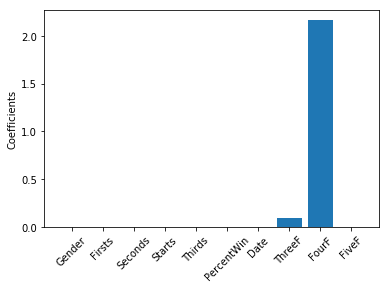

In [407]:
elastic_coef = enMaid.fit(xm_train, ym_train).coef_
_ = plt.bar(range(len(xm_train.columns)), elastic_coef)
_ = plt.xticks(range(len(xm_train.columns)), xm_train.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()

In [409]:
finalguesses_Maiden = [{'Horse Name': 'Lady Lemon Drop' ,'Maiden Horse Guess': 10116.53721999},
               {'Horse Name': 'Curlins Prize' ,'Maiden Horse Guess': 10097.09521978},
               {'Horse Name': 'Luminoso' ,'Maiden Horse Guess':10063.11500294},
               {'Horse Name': 'Party Dancer' ,'Maiden Horse Guess': 10069.32339855},
               {'Horse Name': 'Bring on the Band' ,'Maiden Horse Guess': 10054.64900894},
               {'Horse Name': 'Rockin Ready' ,'Maiden Horse Guess': 10063.67940254},
               {'Horse Name': 'Rattle' ,'Maiden Horse Guess': 10073.93665433},
               {'Horse Name': 'Curlins Journey' ,'Maiden Horse Guess': 10072.45966259},
               {'Horse Name': 'Heaven Escape' ,'Maiden Horse Guess':10092.43120946}]

### EN-CV prediction

In [346]:
encvL = ElasticNetCV(l1_ratio = 0.99)
fiten = encvL.fit(X_ttrain, y_ttrain)

preds = fiten.predict(todays_race)

r2_training = encvL.score(X_ttrain, y_ttrain)
y = np.trim_zeros(encvL.fit(X_ttrain,y_ttrain).coef_)
adj_rsq = 1 - (1-r2_training)*(len(X_ttrain)-1)/(len(X_ttrain)-X_ttrain.shape[1]-len(y)-1)


print('Output Predictions', preds)
print('R2:', r2_training)
print('R2 Adjusted:', adj_rsq)
print('Alpha:',encv.alpha_)
print('L1:',encv.l1_ratio_)
print('Coefficients:',fiten.coef_)



Output Predictions [9609.70585871 9645.82659915 9558.93257549 9564.01963654 9577.9212198
 9556.46879067 9549.09508205 9546.58621572 9586.917829  ]
R2: 0.13490409373110013
R2 Adjusted: -0.686937017224355
Alpha: 22.624455747388357
L1: 0.99
Coefficients: [ 0.         -3.3306084  -1.00376514 -0.         -0.         -0.
 -1.1288019  -0.          1.04027195  1.72458346]


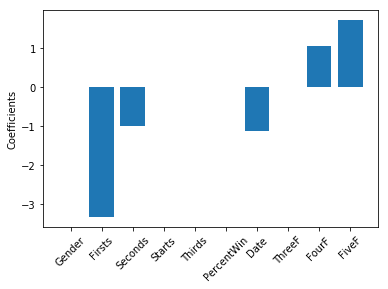

In [388]:
elastic_coef = encvL.fit(X_ttrain, y_ttrain).coef_
_ = plt.bar(range(len(X_ttrain.columns)), elastic_coef)
_ = plt.xticks(range(len(X_ttrain.columns)), X_ttrain.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()

In [362]:
finalguesses_EN = [{'Horse Name': 'Lady Lemon Drop' ,'Guess': 9609.70585871},
               {'Horse Name': 'Curlins Prize' ,'Guess': 9645.82659915},
               {'Horse Name': 'Luminoso' ,'Guess':9558.93257549},
               {'Horse Name': 'Party Dancer' ,'Guess': 9564.01963654},
               {'Horse Name': 'Bring on the Band' ,'Guess': 9577.9212198},
               {'Horse Name': 'Rockin Ready' ,'Guess':  9556.46879067},
               {'Horse Name': 'Rattle' ,'Guess': 9549.09508205},
               {'Horse Name': 'Curlins Journey' ,'Guess': 9546.58621572},
               {'Horse Name': 'Heaven Escape' ,'Guess':9586.917829}]

### Linear Regression prediction

In [347]:
Xlin = X_ttrain
ylin = y_ttrain

In [351]:
lr = LinearRegression()
lrfit = lr.fit(Xlin, ylin)

preds = lrfit.predict(todays_race)

r2_training = lr.score(Xlin, ylin)
r2adj_training = 1 - (1-r2_training)*(len(ylin)-1)/(len(ylin)-Xlin.shape[1]-1)


print('Output Predictions', preds)
print('R2:', r2_training)
print('R2 Adjusted:', r2adj_training)



Output Predictions [9720.65585682 9746.17852003 9608.10444379 9633.58532183 9621.04698335
 9561.82026773 9644.13062968 9666.24092249 9700.56665335]
R2: 0.4319523569243877
R2 Adjusted: 0.23607385931210767


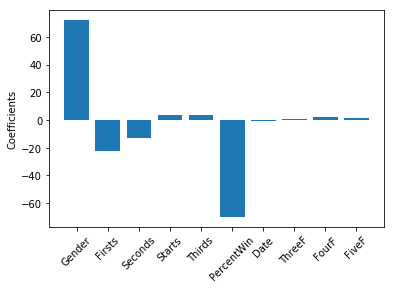

In [390]:
elastic_coef = lrfit.fit(Xlin, ylin).coef_
_ = plt.bar(range(len(Xlin.columns)), elastic_coef)
_ = plt.xticks(range(len(Xlin.columns)), Xlin.columns, rotation=45)
_ = plt.ylabel('Coefficients')
plt.show()

In [363]:
finalguesses_Lin = [{'Horse Name': 'Lady Lemon Drop' ,'Guess': 9720.65585682},
               {'Horse Name': 'Curlins Prize' ,'Guess': 9746.17852003},
               {'Horse Name': 'Luminoso' ,'Guess':9608.10444379},
               {'Horse Name': 'Party Dancer' ,'Guess': 9633.58532183},
               {'Horse Name': 'Bring on the Band' ,'Guess': 9621.04698335},
               {'Horse Name': 'Rockin Ready' ,'Guess': 9561.82026773},
               {'Horse Name': 'Rattle' ,'Guess': 9644.13062968},
               {'Horse Name': 'Curlins Journey' ,'Guess': 9666.24092249},
               {'Horse Name': 'Heaven Escape' ,'Guess':9700.56665335}]

### Setting the data frames

In [402]:
GuessLin = pd.DataFrame(finalguesses_Lin)
GuessMaid = pd.DataFrame(finalguesses_Maiden)
GuessEN = pd.DataFrame(finalguesses_EN)

In [383]:
GuessLin.sort_values('Guess')

,Guess,Horse Name
5,9561.820268,Rockin Ready
2,9608.104444,Luminoso
4,9621.046983,Bring on the Band
3,9633.585322,Party Dancer
6,9644.130630,Rattle
7,9666.240922,Curlins Journey
8,9700.566653,Heaven Escape
0,9720.655857,Lady Lemon Drop
1,9746.178520,Curlins Prize


In [410]:
GuessMaid.sort_values('Maiden Horse Guess')

,Horse Name,Maiden Horse Guess
4,Bring on the Band,10054.649009
2,Luminoso,10063.115003
5,Rockin Ready,10063.679403
6,Rattle,10063.679403
3,Party Dancer,10069.323399
8,Heaven Escape,10072.709796
7,Curlins Journey,10073.240996
1,Curlins Prize,10097.220865
0,Lady Lemon Drop,10120.683762


In [385]:
GuessEN.sort_values('Guess')

,Guess,Horse Name
7,9546.586216,Curlins Journey
6,9549.095082,Rattle
5,9556.468791,Rockin Ready
2,9558.932575,Luminoso
3,9564.019637,Party Dancer
4,9577.921220,Bring on the Band
8,9586.917829,Heaven Escape
0,9609.705859,Lady Lemon Drop
1,9645.826599,Curlins Prize
